In [2]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [3]:
tbl1 = read_csv("final_project_data.csv")
tbl2 = read_csv("bret-1.csv")
tbl = cbind(tbl1, tbl2)
tbl$min10 = pmin((tbl$...1 + 10), 524160)
tbl$rf10 = (tbl$Asset_1[tbl$min10] - tbl$Asset_1)/tbl$Asset_1
#creating data to use and making a forward returns column

New names:
* `` -> ...1

Rows: 524160 Columns: 4

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl (4): ...1, Asset_1, Asset_2, Asset_3


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 524160 Columns: 9

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl (9): Asset_1_BRet_3, Asset_1_BRet_10, Asset_1_BRet_30, Asset_2_BRet_3, A...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



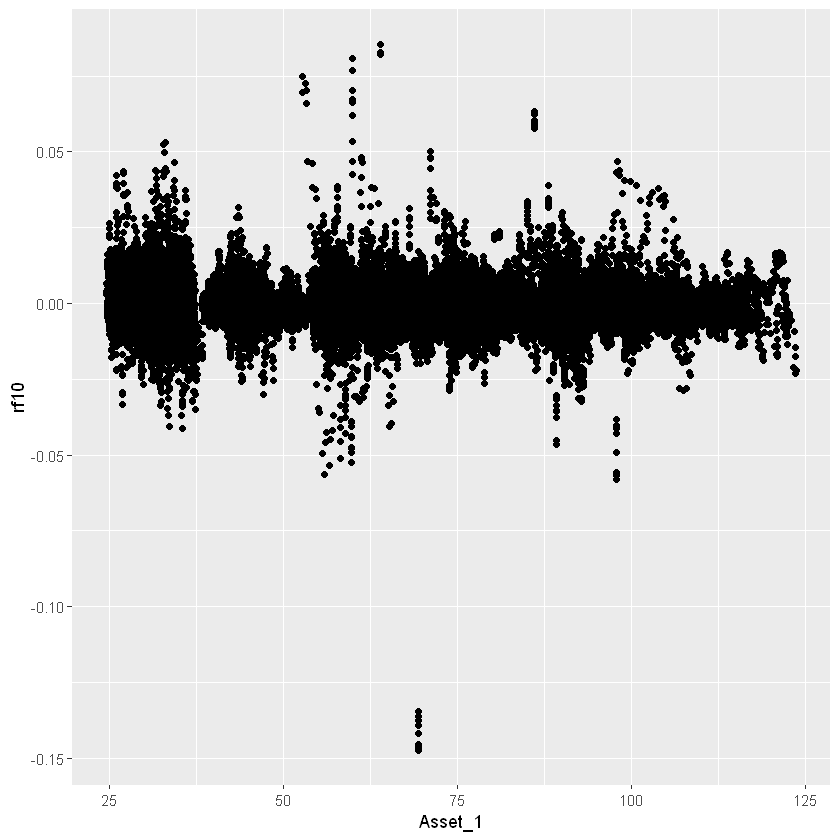

In [8]:
ggplot(tbl) + geom_point(aes(Asset_1, rf10))

In [4]:
head(tbl)

,...1,Asset_1,Asset_2,Asset_3,Asset_1_BRet_3,Asset_1_BRet_10,Asset_1_BRet_30,Asset_2_BRet_3,Asset_2_BRet_10,Asset_2_BRet_30,Asset_3_BRet_3,Asset_3_BRet_10,Asset_3_BRet_30
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,56.2980,30.370,172.0965,0.000000000,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,0.000000000
2,1,56.4790,30.745,171.5400,0.003215034,0.0032150343,0.0032150343,0.012347712,0.0123477116,0.0123477116,-0.0032336509,-0.003233651,-0.003233651
3,2,56.4685,30.744,171.3765,0.003028527,0.0030285268,0.0030285268,0.012314784,0.0123147843,0.0123147843,-0.0041836993,-0.004183699,-0.004183699
4,3,56.3705,30.649,171.3750,0.001287790,0.0012877900,0.0012877900,0.009186697,0.0091866974,0.0091866974,-0.0041924153,-0.004192415,-0.004192415
5,4,56.3415,30.496,171.3615,-0.002434533,0.0007726740,0.0007726740,-0.008098878,0.0041488311,0.0041488311,-0.0010405736,-0.004270860,-0.004270860
6,5,56.3405,30.348,171.2835,-0.002266750,0.0007549114,0.0007549114,-0.012880562,-0.0007243991,-0.0007243991,-0.0005426648,-0.004724094,-0.004724094


In [6]:
cutoff = floor(nrow(tbl)*.7)

In [7]:
train = tbl[1:cutoff,]
test = tbl[(cutoff+1):nrow(tbl),]
#splitting data

In [8]:
mod1 = lm(rf10 ~ Asset_1_BRet_3+Asset_1_BRet_10+Asset_1_BRet_30+Asset_2_BRet_3+Asset_2_BRet_10+Asset_2_BRet_30+Asset_3_BRet_3+Asset_3_BRet_10+Asset_3_BRet_30, train)

In [9]:
summary(mod1)
#forward returns of asset 1 with backwards returns as features


Call:
lm(formula = rf10 ~ Asset_1_BRet_3 + Asset_1_BRet_10 + Asset_1_BRet_30 + 
    Asset_2_BRet_3 + Asset_2_BRet_10 + Asset_2_BRet_30 + Asset_3_BRet_3 + 
    Asset_3_BRet_10 + Asset_3_BRet_30, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.147290 -0.000864  0.000009  0.000875  0.085483 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -9.335e-06  4.498e-06  -2.075  0.03795 *  
Asset_1_BRet_3   4.448e-02  3.854e-03  11.542  < 2e-16 ***
Asset_1_BRet_10  1.290e-02  2.399e-03   5.375 7.64e-08 ***
Asset_1_BRet_30  6.352e-03  1.192e-03   5.330 9.84e-08 ***
Asset_2_BRet_3   2.356e-02  2.107e-03  11.184  < 2e-16 ***
Asset_2_BRet_10 -3.676e-03  1.357e-03  -2.710  0.00674 ** 
Asset_2_BRet_30  7.678e-03  7.193e-04  10.675  < 2e-16 ***
Asset_3_BRet_3   1.938e-02  2.124e-03   9.124  < 2e-16 ***
Asset_3_BRet_10  2.597e-03  1.362e-03   1.906  0.05664 .  
Asset_3_BRet_30 -7.439e-04  6.897e-04  -1.079  0.28073    
---
Signif. c

2-3, 2-30, and 3-3 are significant

In [49]:
c(cor(predict(mod1, train), train$rf10), cor(predict(mod1, test), test$rf10))
#in sample and out sample correlations

[1] 0.06856454 0.04302499

In [16]:
three_weeks = 60*24*7

In [11]:
preds = predict(mod1,tbl)

In [14]:
length(tbl$rf10)

[1] 524160

In [17]:
correlations <- c()
for(i in 1:nrow(tbl)) {
  
  indexes <- max((i-three_weeks), 1)
  
  if(indexes == 1) {
    correlations <- c(correlations, round(cor(tbl$rf10[1:i], preds[1:i]),4))
  }
  
  else{
    
   correlations <- c(correlations, round(cor(tbl$rf10[indexes:i], preds[indexes:i]),4))
  }
  
}
#backward rolling correlations
correlations

[1]      NA -1.0000 -1.0000 -0.9739 -0.8134 -0.7716 -0.7657 -0.7631 -0.7587
   [10] -0.6480 -0.4116 -0.4118 -0.4626 -0.4280 -0.3232 -0.2010 -0.1965 -0.1882
   [19] -0.1854 -0.1938 -0.1902 -0.1943 -0.1913 -0.2118 -0.1959 -0.2201 -0.2574
   [28] -0.2418 -0.1033 -0.0092  0.0090  0.0378  0.1074  0.1631  0.2146  0.2715
   [37]  0.3035  0.3168  0.3082  0.2589  0.2464  0.2437  0.2348  0.2191  0.2069
   [46]  0.2048  0.2058  0.2067  0.2065  0.2061  0.2061  0.2070  0.2071  0.2072
   [55]  0.2064  0.0667  0.0282  0.0145  0.0297  0.0316  0.0415  0.0517  0.0614
   [64]  0.0718  0.0731  0.1024  0.1191  0.1152  0.1198  0.1250  0.1291  0.1324
   [73]  0.1338  0.1347  0.1352  0.1384  0.1403  0.1435  0.1472  0.1569  0.1632
   [82]  0.1752  0.1877  0.2105  0.2383  0.2623  0.2805  0.2961  0.3173  0.3345
   [91]  0.3530  0.3712  0.3887  0.4052  0.4162  0.4258  0.4325  0.4356  0.4373
  [100]  0.4369  0.4294  0.4052  0.3909  0.3820  0.3787  0.3752  0.3715  0.3687
  [109]  0.3664  0.3648  0.3638  0.3637  0.3640  0.3647  0.3655  0.3662  0.3670
  [118]  0.3678  0.3688  0.3207  0.2764  0.2348  0.1983  0.1632  0.1321  0.1074
  [127]  0.0934  0.0822  0.1360  0.1928  0.2382  0.2577  0.2635  0.2667  0.2663
  [136]  0.2686  0.2698  0.2656  0.2568  0.2464  0.2343  0.2284  0.2238  0.2223
  [145]  0.2235  0.2257  0.2283  0.2181  0.1867  0.1639  0.1631  0.1688  0.1658
  [154]  0.1585  0.1549  0.1596  0.1647  0.1693  0.1761  0.1798  0.1811  0.1785
  [163]  0.1732  0.1716  0.1719  0.1678  0.1668  0.1671  0.1684  0.1693  0.1700
  [172]  0.1704  0.1706  0.1708  0.1712  0.1717  0.1723  0.1730  0.1737  0.1754
  [181]  0.1769  0.1787  0.1812  0.1837  0.1865  0.1894  0.1915  0.1930  0.1984
  [190]  0.2025  0.2043  0.2041  0.2043  0.2006  0.1976  0.1931  0.1894  0.1866
  [199]  0.1861  0.1863  0.1862  0.1862  0.1862  0.1861  0.1860  0.1855  0.1853
  [208]  0.1854  0.1857  0.1862  0.1864  0.1864  0.1863  0.1856  0.1857  0.1860
  [217]  0.1865  0.1871  0.1879  0.1885  0.1886  0.1884  0.1884  0.1888  0.1893
  [226]  0.1897  0.1898  0.1901  0.1906  0.1911  0.1916  0.1919  0.1923  0.1927
  [235]  0.1930  0.1934  0.1938  0.1941  0.1944  0.1947  0.1950  0.1956  0.1960
  [244]  0.1965  0.1969  0.1973  0.1976  0.1978  0.1980  0.1983  0.1978  0.1983
  [253]  0.1984  0.1980  0.1976  0.1974  0.1973  0.1972  0.1968  0.1962  0.1955
  [262]  0.1952  0.1952  0.1952  0.1951  0.1951  0.1953  0.1953  0.1945  0.1937
  [271]  0.1930  0.1923  0.1919  0.1916  0.1916  0.1915  0.1917  0.1915  0.1915
  [280]  0.1915  0.1908  0.1902  0.1898  0.1898  0.1899  0.1899  0.1898  0.1898
  [289]  0.1899  0.1900  0.1901  0.1900  0.1902  0.1903  0.1905  0.1905  0.1905
  [298]  0.1905  0.1905  0.1904  0.1902  0.1898  0.1894  0.1886  0.1879  0.1874
  [307]  0.1865  0.1859  0.1856  0.1858  0.1862  0.1863  0.1859  0.1851  0.1835
  [316]  0.1808  0.1787  0.1761  0.1748  0.1750  0.1758  0.1766  0.1772  0.1777
  [325]  0.1783  0.1791  0.1801  0.1812  0.1820  0.1825  0.1830  0.1831  0.1838
  [334]  0.1844  0.1847  0.1851  0.1857  0.1863  0.1866  0.1869  0.1872  0.1875
  [343]  0.1878  0.1881  0.1884  0.1886  0.1888  0.1891  0.1893  0.1895  0.1897
  [352]  0.1899  0.1901  0.1903  0.1904  0.1906  0.1907  0.1909  0.1910  0.1907
  [361]  0.1903  0.1898  0.1894  0.1889  0.1884  0.1880  0.1876  0.1871  0.1869
  [370]  0.1866  0.1863  0.1861  0.1860  0.1858  0.1858  0.1858  0.1857  0.1855
  [379]  0.1854  0.1854  0.1852  0.1853  0.1856  0.1858  0.1859  0.1859  0.1862
  [388]  0.1865  0.1867  0.1867  0.1865  0.1863  0.1865  0.1866  0.1867  0.1867
  [397]  0.1870  0.1872  0.1871  0.1870  0.1871  0.1873  0.1875  0.1878  0.1880
  [406]  0.1879  0.1878  0.1878  0.1879  0.1879  0.1880  0.1880  0.1880  0.1881
  [415]  0.1881  0.1881  0.1881  0.1881  0.1882  0.1882  0.1883  0.1883  0.1884
  [424]  0.1884  0.1885  0.1886  0.1889  0.1892  0.1894  0.1895  0.1895  0.1896
  [433]  0.1896  0.1896  0.1896  0.1897  0.1898  0.1899  0.1901  0.1902  0.1904
  [442]  0.1905  0.1907  0.1908  0.1909  0.1910  0.1911  0.1912  0.1914  0.1915
  [4

Warning message:
"Removed 1 rows containing missing values (geom_point)."


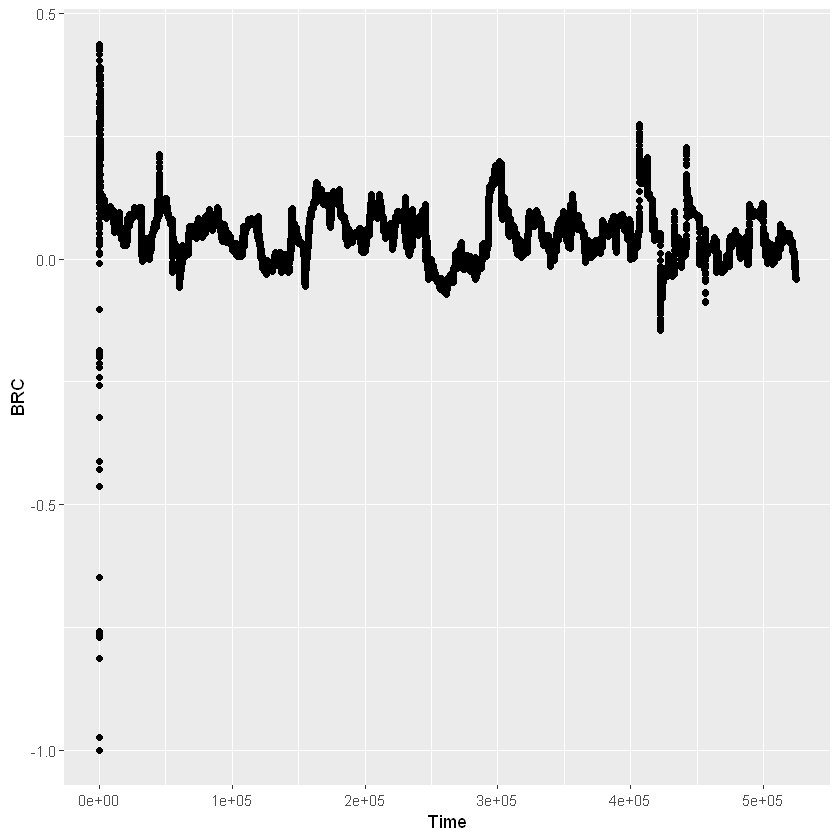

In [19]:
ggplot() + geom_point(aes(tbl$...1, correlations)) + labs(x = "Time", y = "BRC", main = "Backwards Rolling Correlation over time")

The correlaton structure is relatively stationary over the year.